# Data Cleaning and Exploration

In this notebook I shall start exploring the data from [Nepal Earthquake Open Data Portal](http://eq2015.npc.gov.np/#/)

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading csv files using pandas to start exploring

In [2]:
structure_df = pd.read_csv('../../data/csv_building_structure.csv')
ownership_df = pd.read_csv('../../data/csv_building_ownership_and_use.csv')
ward_df = pd.read_csv('../../data/ward_vdcmun_district_name_mapping.csv')                        

Inspecting `structure_df` to analyze its shape, features, values....

In [3]:
structure_df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [4]:
structure_df.shape

(762106, 31)

In [5]:
def structure_df_unique_values(feature):
    print(f'Unique values for {feature} are : ', structure_df[feature].unique())
    print(f'Number of nulls for {feature} are : ', structure_df[feature].isna().sum())
    print('===========================================================================')
structure_columns = structure_df.columns[4:]
for col in structure_columns:
    structure_df_unique_values(col)

Unique values for count_floors_pre_eq are :  [1 2 3 4 9 5 6 7 8]
Number of nulls for count_floors_pre_eq are :  0
Unique values for count_floors_post_eq are :  [1 0 2 3 4 9 5 6 8 7]
Number of nulls for count_floors_post_eq are :  0
Unique values for age_building are :  [  9  15  20  30  18  13   8  22  10   3   2   7  50  29  25  14  23  40
   1  82  35  60  45  11  32  16  27  12  65  33   4  24  47  99   5  70
  80  44  75  21   6  17  58  57  19  26  28  95  90  71  55  39  48  42
  85   0  38  52  56  59  84  46  68 105  51  41  62  61  36  34  78 100
  54  72  31  43  37  49  81  53  69 187 999  66  63 102  87  79 140  88
  64 120  93 115  86 130 160  92  77  73  67  83  76 101 110 176  74 200
 190 150 111 119  96  98  94  91  89 125 167  97 123 103 180 112 133 116
 145 114 121 144 108 122 155 172 132 131 106 148 113 109 165 118 117 107
 170 104 162 152 127 151 146 196 126 175 138 141 178 128 149 164 199 135
 166 168 156 161 142 185 173 136 177 174 124 134 193 195]
Number of nulls

`building_age` values range from 0-999, 999?? are these values legitimate? 

target variable `damage_grade` can de condensed to 3 classes? 

`class 1 - no or minor repair`, `class 2 - major repair`, `class 3 -  reconstruction`


In [6]:
ownership_df.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [7]:
ownership_df.shape

(762106, 17)

In [8]:
def ownership_unique_values(feature):
    print(f'The unique values for {feature} : ', ownership_df[feature].unique())
    print(f'Number of nulls for {feature} are : ', ownership_df[feature].isna().sum())
    print('==============================================================')
colnames = ownership_df.columns[4:]

In [9]:
for col in colnames:
    ownership_unique_values(col)

The unique values for legal_ownership_status :  ['Private' 'Other' 'Institutional' 'Public']
Number of nulls for legal_ownership_status are :  0
The unique values for count_families :  [ 1.  0.  2.  3.  4.  5.  6.  9.  7. nan  8. 11.]
Number of nulls for count_families are :  2
The unique values for has_secondary_use :  [ 0.  1. nan]
Number of nulls for has_secondary_use are :  10
The unique values for has_secondary_use_agriculture :  [0 1]
Number of nulls for has_secondary_use_agriculture are :  0
The unique values for has_secondary_use_hotel :  [0 1]
Number of nulls for has_secondary_use_hotel are :  0
The unique values for has_secondary_use_rental :  [0 1]
Number of nulls for has_secondary_use_rental are :  0
The unique values for has_secondary_use_institution :  [0 1]
Number of nulls for has_secondary_use_institution are :  0
The unique values for has_secondary_use_school :  [0 1]
Number of nulls for has_secondary_use_school are :  0
The unique values for has_secondary_use_industry

In [10]:
sum(structure_df['building_id'] == ownership_df['building_id'])

762106

Looks like the two frames have identical unique building ids, one more check and we can combine them, to include ownership info, family count and other features with the structure dataframe 

In [11]:
print(ownership_df.duplicated('building_id').sum())
print(structure_df.duplicated('building_id').sum())

0
0


We begin by combining the two dataframes first

In [12]:
data = pd.merge(structure_df, ownership_df, on=['building_id', 'district_id', 'vdcmun_id', 'ward_id'])

In [13]:
data.shape

(762106, 44)

In [14]:
data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,0,0,0


We now check the `damage_grade`, `condition_post_earthquake`, and `technical_solution_proposed` columns and see if we can identify and define the target variable clearly

In [15]:
data.loc[[0,5,24,25,26], ['damage_grade', 'condition_post_eq', 'technical_solution_proposed']]

,damage_grade,condition_post_eq,technical_solution_proposed
0,Grade 3,Damaged-Used in risk,Major repair
5,Grade 2,Damaged-Used in risk,Minor repair
24,Grade 2,Damaged-Used in risk,Minor repair
25,Grade 2,Damaged-Used in risk,Minor repair
26,Grade 3,Damaged-Used in risk,Major repair


While trying the gauge the relation between these three columns there are some inconsistencies that can be noticed. For example  while some entries have `condition_post_earthquake` marked as `damaged-Used in risk`, they are marked with different `damage_grade` (2 and 3 ) and differeing `technical_solution_proposed`.

While some relation between `damage_grade` and `technical_solution_proposed` hint towards a clear sub classifiction:

In [16]:
data[data['technical_solution_proposed'] == 'Minor repair']['damage_grade']

2         Grade 2
3         Grade 2
4         Grade 1
5         Grade 2
7         Grade 2
           ...   
761801    Grade 1
762060    Grade 1
762073    Grade 1
762098    Grade 1
762100    Grade 1
Name: damage_grade, Length: 110605, dtype: object

In [17]:
data[data['technical_solution_proposed'] == 'Major repair']['damage_grade']

0         Grade 3
8         Grade 3
9         Grade 3
16        Grade 3
18        Grade 3
           ...   
761240    Grade 3
761241    Grade 3
761305    Grade 3
761705    Grade 3
761940    Grade 3
Name: damage_grade, Length: 129415, dtype: object

In [18]:
data[data['technical_solution_proposed'] == 'Reconstruction']['damage_grade']

1         Grade 5
6         Grade 5
39        Grade 5
44        Grade 5
50        Grade 4
           ...   
762101    Grade 5
762102    Grade 5
762103    Grade 5
762104    Grade 5
762105    Grade 5
Name: damage_grade, Length: 470219, dtype: object

Classify buildings into three classes: 1 = no repairs or minor repairs, 2 = major repairs, 3 = reconstruction

In [19]:
data['target'] = data.damage_grade.map({'Grade 1': 1, 'Grade 2': 1, 'Grade 3': 2, 'Grade 4': 3, 'Grade 5': 3})

In [20]:
data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,target
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,0,0,0,0,0,0,2.0
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,0,0,0,0,0,0,3.0
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,0,0,1.0
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,0,0,1.0
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,0,0,1.0


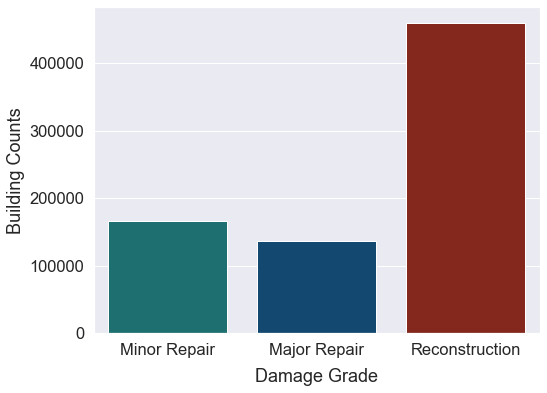

In [21]:
sns.set_style('white')
sns.set(font_scale=1.5)
f,ax = plt.subplots(figsize=(8,6))
sns.barplot(data.target.value_counts().index, data.target.value_counts(), palette=(['#107E7D', '#044B7F', '#95190C']), ax=ax)
ax.set_xticklabels(['Minor Repair', 'Major Repair', 'Reconstruction'])
ax.set_xlabel('Damage Grade', labelpad = 10)
ax.set_ylabel('Building Counts');

looks like a major class imbalance!

We can now drop some columns that are other versions of our identified `target` --->  `damage_grade`, `condition_post_earthquake`, and `technical_solution_proposed`

Also, since we plan to make our classification model generalizable to future building structures , we can go ahead and drop the columns relating to `height_ft_post_eq` and `count_floors_post_eq`

In [22]:
data.shape

(762106, 45)

In [23]:
data.drop(['count_floors_post_eq', 'height_ft_post_eq', 'damage_grade', 'condition_post_eq', 'technical_solution_proposed'], axis=1, inplace=True)

In [24]:
data.shape

(762106, 40)

setting `building_id` as index

In [25]:
data = data.set_index('building_id')

In [27]:
data.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,target
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,9,288,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,0,0,2.0
120101000021,12,1207,120703,1,15,364,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,0,0,3.0
120101000031,12,1207,120703,1,20,384,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,0,0,1.0
120101000041,12,1207,120703,1,20,312,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,0,0,1.0
120101000051,12,1207,120703,1,30,308,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,0,0,0,0,0,1.0


In [28]:
data.isna().sum().sum()

26

26 nan values can be dropped

In [29]:
data.dropna(inplace=True)

In [30]:
data.isna().sum().sum()

0

In [31]:
data.shape

(762093, 39)

In [ ]:
data.columns

In [ ]:
categorical_feats = data.dtypes[data.dtypes == 'object'].index
categorical_feats

In [ ]:
def unique_categorical_values(feature):
    print(f'Unique values for {feature} are: ', data[feature].unique())
    print('================================================================================================')

for feat in categorical_feats:
    unique_categorical_values(feat)

In [ ]:
def clean_text(row):
    return row.lower().replace('-', '_').replace('/', '_or_').replace(' ', '_')

In [89]:
data.foundation_type = data.foundation_type.map(clean_text)

In [91]:
for feat in categorical_feats:
    data[feat] = data[feat].map(clean_text)

In [92]:
for feat in categorical_feats:
    unique_categorical_values(feat)

Unique values for land_surface_condition are:  ['flat' 'moderate_slope' 'steep_slope']
Unique values for foundation_type are:  ['other' 'mud_mortar_stone_or_brick' 'cement_stone_or_brick'
 'bamboo_or_timber' 'rc']
Unique values for roof_type are:  ['bamboo_or_timber_light_roof' 'bamboo_or_timber_heavy_roof'
 'rcc_or_rb_or_rbc']
Unique values for ground_floor_type are:  ['mud' 'brick_or_stone' 'rc' 'timber' 'other']
Unique values for other_floor_type are:  ['not_applicable' 'timber_or_bamboo_mud' 'timber_planck'
 'rcc_or_rb_or_rbc']
Unique values for position are:  ['not_attached' 'attached_1_side' 'attached_2_side' 'attached_3_side']
Unique values for plan_configuration are:  ['rectangular' 'l_shape' 'square' 't_shape' 'multi_projected' 'h_shape'
 'u_shape' 'others' 'e_shape' 'building_with_central_courtyard']
Unique values for legal_ownership_status are:  ['private' 'other' 'institutional' 'public']


In [93]:
data.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,target
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,9,288,9,flat,other,bamboo_or_timber_light_roof,...,0,0,0,0,0,0,0,0,0,2.0
120101000021,12,1207,120703,1,15,364,9,flat,other,bamboo_or_timber_light_roof,...,0,0,0,0,0,0,0,0,0,3.0
120101000031,12,1207,120703,1,20,384,9,flat,other,bamboo_or_timber_light_roof,...,0,0,0,0,0,0,0,0,0,1.0
120101000041,12,1207,120703,1,20,312,9,flat,other,bamboo_or_timber_light_roof,...,0,0,0,0,0,0,0,0,0,1.0
120101000051,12,1207,120703,1,30,308,9,flat,other,bamboo_or_timber_light_roof,...,0,0,0,0,0,0,0,0,0,1.0
